# 01. Preparation Advertisements
__Capstone project: Duration of the insertion of real estate advertisements for rental apartments in Switzerland__

According to a recent [study](https://www.tagesanzeiger.ch/so-wenig-wohnungen-wie-seit-10-jahren-nicht-mehr-nun-steigen-mieten-kraeftig-987026564282), there are currently very few vacant flats in Switzerland. The increasing shortage is reflected in the so-called insertion period. This value indicates how many days a residential property can be found on a real estate portal. According to the study, this period has been decreasing significantly for some time. However, the development is not the same across all municipalities and types for rental apartments. I intend to analyse the duration of insertion for rental apartments in Switzerland and detect patterns, which help to predict the duration of insertion.

## The data

Data from three different sources will be used in this project: advertisements, statistics on the housing market and spatial categories for the municipalities. In this document, I will concentrate on the advertisements. 

The main data are real estate advertisements for rental apartments in Switzerland from the years 2015 to 2020. This data was crawled from the major real estate platforms such as Homegate and Immoscout24 by the company ImmoCompass. The dataset consists of 1'472'488 advertisements and a total of 43 features. 

My target feature is the duration of insertion, called ``Inserionsdauer``. It is calculated by subtracting the date of the last publication minus the date of the first publication. The duration of insertion is measured in days.

In [1]:
%load_ext lab_black

In [2]:
# import commands
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data
import pandas as pd

df = pd.read_csv("data/v_housings.csv", delimiter=",")

In [4]:
# show data
df.head(2)

,Beschreibung,BFS Gemeinde,Erste Publikation,Geometrie,Kenn-Nummer,Letzte Publikation,Link,MS Region,Nummer,Nutzung,...,Nettomiete pro Monat,Nutzung detailliert,Oa Unknownrentmon,Parkplatz aussen,Parkplatz innen,Rollstuhlgängig,Verfügbarkeitskategorie,Vermarkter,Wintergarten,Wohnfläche
0,Zu vermieten in Sarnen (Kanton Obwalden)in ein...,Sarnen,25.07.2019,POINT (917904.89884428 5925098.825207843),495798659,21.11.2019,https://www.homegate.ch/mieten/110266284,Sarneraatal,NaN,Haus,...,3000.0,16.0,NaN,1.0,1.0,-1.0,NaN,NaN,NaN,165.0
1,Villa mitoyenne de 4 pièces,Reconvilier,18.10.2018,POINT (803220.2198443257 5980238.058856224),495647223,29.10.2018,https://www.homegate.ch/mieten/109261351,Jura bernois,39.0,Haus,...,840.0,15.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN


In [5]:
# shape of the data
df.shape

(1472488, 43)

__Variables__

In [6]:
# column names, count and type
display(df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472488 entries, 0 to 1472487
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Beschreibung                 1459195 non-null  object 
 1   BFS Gemeinde                 1472198 non-null  object 
 2   Erste Publikation            1472488 non-null  object 
 3   Geometrie                    1472488 non-null  object 
 4   Kenn-Nummer                  1472488 non-null  int64  
 5   Letzte Publikation           1472488 non-null  object 
 6   Link                         1472487 non-null  object 
 7   MS Region                    1456861 non-null  object 
 8   Nummer                       1053931 non-null  float64
 9   Nutzung                      1472488 non-null  object 
 10  Oa Unknownrentm2Year         116392 non-null   float64
 11  PLZ                          1470442 non-null  float64
 12  Strasse                      1293683 non-n

None

* ``Beschreibung``: Description text in the advertisement
* ``BFS Gemeinde``: Municipality 
* ``Erste Publikation``: Date of first publication
* ``Etagenkategorie``: Floor category (1.floor,  2.floor)
* ``Geometrie``: Geometry
* ``Kenn-Nummer``: Identification number
* ``Letzte Publikation``: Date of last publication
* ``Link``: link
* ``MS Region``: Regions as defined by the FSO, no longer in use
* ``Nummer``: Street number
* ``Nutzung``: usage
* ``PLZ``: ZIP code
* ``Strasse``: Street
* ``Telefon Vermarkter``: Phone number of marketer
* ``Titel``: Title of advertisement
* ``Verfügbar von``: Date of aviability
* ``Zustand``: Condition of the apartment, can be either "used", "as new" or "first occupancy"
* ``Agglomeration``: Regions as defined by the FSO,
* ``Anzahl Zimmer``: number of rooms
* ``Aussicht``: view; "not present", "unknown", "mountain view", "lake view", "other"
* ``Balkon``: balcony
* ``Bauperiode``: Building periods, like "2020-2024", "2016-2019", "2011-2015" and so on
* ``Breitengrad``: Latitude
* ``Bruttomiete pro m2 und Jahr``: Gross rent per m2 and year
* ``Bruttomiete pro Monat``: Gross rent per month
* ``Etage``: floor
* ``Garten``: garden
* ``Gemeinde (geocodiert)``: Geocoded municipality
* ``Grundstücksfläche``: Plot area
* ``Insertionsdauer``: Duration of insertion
* ``Längengrad``: Longitude
* ``Minergie``: Minergy
* ``Nettomiete pro m2 und Jahr``: Net rent per m2 and year
* ``Nettomiete pro Monat``: Net rent per month
* ``Nutzung detailliert``: Detailed usage
* ``Parkplatz aussen``: Parking space outdoors
* ``Parkplatz innen``: Parking space indoors
* ``Rollstuhlgängig``: Wheelchair accessability
* ``Verfügbarkeitskategorie``: Category of availability
* ``Vermarkter``: Marketer
* ``Wintergarten``: Winter garden; "present", "not present", "unknown"
* ``Wohnfläche``: Living area

## Exploratory data analysis (EDA)

### Duplicates

In [7]:
# Count duplicate in the DataFrame
df.duplicated().sum()

0

In [8]:
# check if the id unique
df["Kenn-Nummer"].is_unique

True

In [9]:
# drop the id
df = df.drop(["Kenn-Nummer"], axis=1)

After crawling the data from the different real estate platform, the data is checked for dublicated advertisement. This step is already done by the company ImmoCompass. Therefore, the data I'm using here truly has no dublicates.

### Feature types

In [10]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    28
object     13
int64       1
dtype: int64

In [11]:
# Use pandas.to_datetime() to convert string to datetime format
df.loc[:, "Verfügbar von"] = pd.to_datetime(df["Verfügbar von"], errors="coerce")
df.loc[:, "Erste Publikation"] = pd.to_datetime(df["Erste Publikation"])
df.loc[:, "Letzte Publikation"] = pd.to_datetime(df["Letzte Publikation"])

In [12]:
# These varibales are not numbers, I will convert them to objects

df[
    [
        "Aussicht",
        "Balkon",
        "Minergie",
        "Nutzung detailliert",
        "Bauperiode",
        "Rollstuhlgängig",
        "Verfügbarkeitskategorie",
        "Parkplatz aussen",
        "Parkplatz innen",
        "Agglomeration",
        "Nummer",
        "PLZ",
        "Wintergarten",
        "Garten",
        "Vermarkter",
        "Telefon Vermarkter",
    ]
] = df[
    [
        "Aussicht",
        "Balkon",
        "Minergie",
        "Nutzung detailliert",
        "Bauperiode",
        "Rollstuhlgängig",
        "Verfügbarkeitskategorie",
        "Parkplatz aussen",
        "Parkplatz innen",
        "Agglomeration",
        "Nummer",
        "PLZ",
        "Wintergarten",
        "Garten",
        "Vermarkter",
        "Telefon Vermarkter",
    ]
].astype(
    object
)

In [13]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

object            25
float64           13
datetime64[ns]     3
int64              1
dtype: int64

In [14]:
# Show column names of type date
print(f"Type date: {df.select_dtypes(include='datetime64').columns}")

Type date: Index(['Erste Publikation', 'Letzte Publikation', 'Verfügbar von'], dtype='object')


In [15]:
# Show column names of type integer
print(f"Type integer: {df.select_dtypes(include='int').columns}")

Type integer: Index(['Insertionsdauer'], dtype='object')


In [16]:
# Show column names of type float
print(f"Type float: {df.select_dtypes(include='float').columns}")

Type float: Index(['Oa Unknownrentm2Year', 'Anzahl Zimmer', 'Breitengrad',
       'Bruttomiete pro m2 und Jahr', 'Bruttomiete pro Monat', 'Etage',
       'Gemeinde (geocodiert)', 'Grundstücksfläche', 'Längengrad',
       'Nettomiete pro m2 und Jahr', 'Nettomiete pro Monat',
       'Oa Unknownrentmon', 'Wohnfläche'],
      dtype='object')


In [17]:
# Show column names of type object
print(f"Type object: {df.select_dtypes(include='object').columns}")

Type object: Index(['Beschreibung', 'BFS Gemeinde', 'Geometrie', 'Link', 'MS Region',
       'Nummer', 'Nutzung', 'PLZ', 'Strasse', 'Telefon Vermarkter', 'Titel',
       'Zustand', 'Agglomeration', 'Aussicht', 'Balkon', 'Bauperiode',
       'Garten', 'Minergie', 'Nutzung detailliert', 'Parkplatz aussen',
       'Parkplatz innen', 'Rollstuhlgängig', 'Verfügbarkeitskategorie',
       'Vermarkter', 'Wintergarten'],
      dtype='object')


Among the variables of type object are pure textual ones: 
* ``Beschreibung`` &  ``Titel``
* ``Link``

And there are some related to the location:
* ``BFS Gemeinde``, ``Gemeinde (geocodiert)``
* ``Strasse``, ``Nummer`` & ``PLZ``
* ``Agglomeration`` & ``MS Region``
* ``Geometrie``

I will drop the plain text columns as they would require extensive preprocessing.

In [18]:
# drop columns
df = df.drop(["Beschreibung", "Titel", "Link"], axis=1)

I will also drop the features related to the location, except for the municipality itself. 

In [19]:
# drop columns
df = df.drop(
    [
        "Strasse",
        "Nummer",
        "PLZ",
        "Agglomeration",
        "MS Region",
        "Geometrie",
        "Gemeinde (geocodiert)",
    ],
    axis=1,
)

# rename the columm as "Gemeinde"
df.rename(columns={"BFS Gemeinde": "Gemeinde"}, inplace=True)

### Missing values

I will drop all columns with no values at all.

In [20]:
# drop the completly empty columns
df = df.dropna(how="all", axis=1)

In [21]:
print("New shape of DataFrame:", df.shape)

New shape of DataFrame: (1472488, 32)


In [22]:
print(f"The count of missing values is: {df.isna().sum().sum()}")

The count of missing values is: 18295436


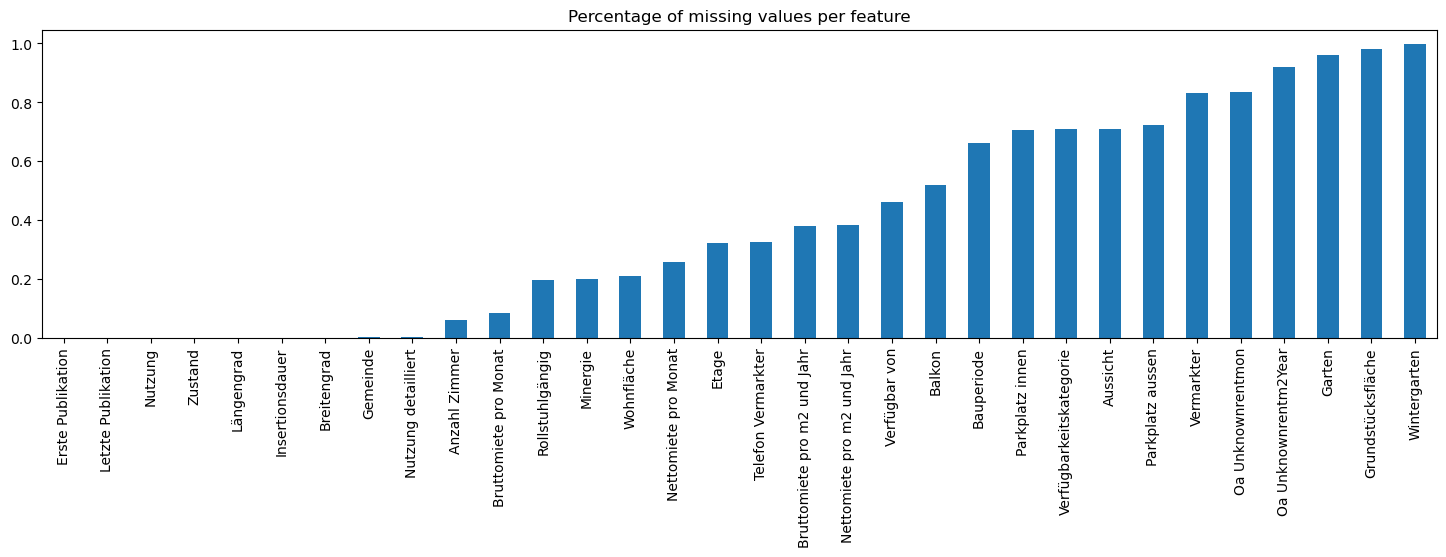

In [23]:
# identify the ratio of missing values per feature
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(18, 4), title="Percentage of missing values per feature"
)
plt.show()

In [24]:
# Shape of feature matrix before cleaning
print("Shape before cleaning:", df.shape)

# Lets drop all features that have more than 75% of missing values.
df = df.dropna(thresh=df.shape[0] * 0.25, axis=1)

# Shape of feature matrix before cleaning
print("Shape after cleaning:", df.shape)

Shape before cleaning: (1472488, 32)
Shape after cleaning: (1472488, 26)


The features ``Wintergarten``, ``Grundstücksfläche``, ``Garten``, ``Oa Unknownrentm2Year``, ``Oa Unknownrentmon`` and ``Vermarkter``have more than 75% of missing values and are therefore deleted. As the feature marketer is deleted, the telephone number of the marketer (``Telefon Vermarkter``) can be deleted as well, as it adds no value.

In [25]:
# drop column
df = df.drop(["Telefon Vermarkter"], axis=1)

#### object

In [26]:
# show missing values of type object
df.select_dtypes(include="object").isnull().sum().sort_values(ascending=False).head(21)

Parkplatz aussen           1061658
Aussicht                   1042348
Verfügbarkeitskategorie    1042092
Parkplatz innen            1038220
Bauperiode                  973229
Balkon                      765681
Minergie                    292172
Rollstuhlgängig             286560
Nutzung detailliert           2591
Gemeinde                       290
Nutzung                          0
Zustand                          0
dtype: int64

In [27]:
# replace the missing values with a string
for feature in [
    "Parkplatz aussen",
    "Parkplatz innen",
    "Aussicht",
    "Verfügbarkeitskategorie",
    "Bauperiode",
    "Balkon",
    "Minergie",
    "Rollstuhlgängig",
    "Rollstuhlgängig",
    "Nutzung detailliert",
]:
    df[feature] = df[feature].fillna("unknown")

In [28]:
# Check missing values of type object
df.select_dtypes(include="object").isnull().sum().sort_values(ascending=False).head(1)

Gemeinde    290
dtype: int64

In [29]:
# drop the rows with the missing informaiton
df = df[df["Gemeinde"].notna()]

#### datetime

In [30]:
# show missing values of type datetime
df.select_dtypes(include="datetime64").isnull().sum().sort_values(ascending=False).head(
    21
)

Verfügbar von         677102
Erste Publikation          0
Letzte Publikation         0
dtype: int64

There are too many missing values in the column ``Verfügbar von``, therefore I will delete the column.

In [31]:
# drop column
df = df.drop(["Verfügbar von"], axis=1)

The duration of insertion is calculated by subtracting the date of the last publication minus the date of the first publication. I therefore have to delete the last date of publication from my data, because this column would not be in a dataset where the target variable is missing.

In [32]:
# drop column
df = df.drop(["Letzte Publikation"], axis=1)

#### number

In [33]:
# show missing values of type number
df.select_dtypes(include="number").isnull().sum().sort_values(ascending=False).head(10)

Nettomiete pro m2 und Jahr     564475
Bruttomiete pro m2 und Jahr    559188
Etage                          474831
Nettomiete pro Monat           376347
Wohnfläche                     306910
Bruttomiete pro Monat          124664
Anzahl Zimmer                   87557
Breitengrad                         0
Insertionsdauer                     0
Längengrad                          0
dtype: int64

In [34]:
# fill rows with missing values with a calculated rent

# fill empty values in rent per m2 and year
df["Nettomiete pro m2 und Jahr"] = df["Nettomiete pro m2 und Jahr"].fillna(
    df["Nettomiete pro Monat"] * 12 / df["Wohnfläche"]
)

# fill empty values in rent per month
df["Nettomiete pro Monat"] = df["Nettomiete pro Monat"].fillna(
    df["Nettomiete pro m2 und Jahr"] / 12 * df["Wohnfläche"]
)

# fill empty values in surface area
df["Wohnfläche"] = df["Wohnfläche"].fillna(
    df["Nettomiete pro Monat"] / (df["Nettomiete pro m2 und Jahr"] / 12)
)

In [35]:
# show missing values of type number
df.select_dtypes(include="number").isnull().sum().sort_values(ascending=False).head(10)

Nettomiete pro m2 und Jahr     564468
Bruttomiete pro m2 und Jahr    559188
Etage                          474831
Nettomiete pro Monat           376298
Wohnfläche                     295413
Bruttomiete pro Monat          124664
Anzahl Zimmer                   87557
Breitengrad                         0
Insertionsdauer                     0
Längengrad                          0
dtype: int64

I will try to fill some more of the missing rents by calculating the net rent from the gross rent. But before doing so, I will correct the number of rooms (``Anzahl Zimmer``). I will come back to these missing values after this.

__number of rooms__

In [36]:
# Check the unique variables in the feature number of rooms
df["Anzahl Zimmer"].unique()

array([ 6.   ,  4.   ,  5.   ,  6.5  ,  1.   ,  4.5  ,  3.5  ,  5.5  ,
          nan, 10.   ,  7.5  ,  3.   ,  7.   ,  8.5  ,  8.   ,  9.   ,
        1.5  ,  2.   ,  9.5  , 15.   , 11.   ,  2.5  , 13.   , 12.   ,
       16.5  , 10.5  ,  0.5  , 14.   , 20.   ,  1.07 , 12.5  , 45.   ,
       17.   ,  4.2  , 35.   ,  1.1  , 25.   ,  3.3  , 11.5  , 18.   ,
        4.4  ,  0.3  , 75.   , 16.   , 55.   , 14.5  , 19.5  ,  2.3  ,
        3.1  ,  0.1  ,  0.6  , 13.5  ,  1.02 ,  0.4  ,  3.585, 19.   ,
       22.   ,  0.2  , 15.5  , 10.2  ,  1.04 ,  5.2  , 27.   , 36.   ,
        4.3  , 65.   , 20.5  , 43.5  ,  2.1  , 42.5  , 30.   , 17.5  ,
       18.5  ,  3.2  , 41.   ,  4.6  ,  2.2  , 47.5  , 51.   , 56.   ,
       50.   ])

In [37]:
# replace the values with more than 10 rooms and less then one room with nan.
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] < 1),
    np.NaN,
    df["Anzahl Zimmer"],
)

df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 11),
    np.NaN,
    df["Anzahl Zimmer"],
)

# reassign the numbers to a neat structure
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 1) & (df["Anzahl Zimmer"] < 2), 1, df["Anzahl Zimmer"]
)
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 2) & (df["Anzahl Zimmer"] < 3), 2, df["Anzahl Zimmer"]
)
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 3) & (df["Anzahl Zimmer"] < 4), 3, df["Anzahl Zimmer"]
)
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 4) & (df["Anzahl Zimmer"] < 5), 4, df["Anzahl Zimmer"]
)
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 5) & (df["Anzahl Zimmer"] < 6), 5, df["Anzahl Zimmer"]
)
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 6) & (df["Anzahl Zimmer"] < 7), 6, df["Anzahl Zimmer"]
)
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 7) & (df["Anzahl Zimmer"] < 8), 7, df["Anzahl Zimmer"]
)
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 8) & (df["Anzahl Zimmer"] < 9), 8, df["Anzahl Zimmer"]
)
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 9) & (df["Anzahl Zimmer"] < 10), 9, df["Anzahl Zimmer"]
)
df["Anzahl Zimmer"] = np.where(
    (df["Anzahl Zimmer"] >= 10) & (df["Anzahl Zimmer"] < 11), 10, df["Anzahl Zimmer"]
)

In [38]:
# show the percentage of values per category
AZ_count = (
    df["Anzahl Zimmer"].value_counts(ascending=False, normalize=True, dropna=False)
    * 100
)
AZ_count.head(15)

3.0     32.305777
4.0     22.806715
2.0     19.661690
1.0      9.331557
5.0      6.714993
NaN      6.028401
6.0      1.958772
7.0      0.727076
8.0      0.267084
9.0      0.118462
10.0     0.079473
Name: Anzahl Zimmer, dtype: float64

__rent per m2 and year__

I will try to calculate the missing net rents by using the gross rents.

In [39]:
# show the amount of data with missing net rent but present values for gross rent and number of rooms
df[
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (~df["Anzahl Zimmer"].isna())
].shape

(41077, 23)

In [40]:
# show the median of rent difference between gross and net rent per number of rooms
df_diff = df.groupby(["Anzahl Zimmer"])["Bruttomiete pro m2 und Jahr"].median().round(
    1
) - df.groupby(["Anzahl Zimmer"])["Nettomiete pro m2 und Jahr"].median().round(1)
df_diff

Anzahl Zimmer
1.0     38.4
2.0     31.6
3.0     29.5
4.0     26.4
5.0     21.6
6.0     13.0
7.0     11.0
8.0      9.6
9.0      8.1
10.0     2.3
dtype: float64

In [41]:
# define the subsets based on the different number of rooms
a1 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 1)
)

a2 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 2)
)

a3 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 3)
)

a4 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 4)
)

a5 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 5)
)

a6 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 6)
)

a7 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 7)
)

a8 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 8)
)

a9 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 9)
)

a10 = (
    (df["Nettomiete pro m2 und Jahr"].isna())
    & (~df["Bruttomiete pro m2 und Jahr"].isna())
    & (df["Anzahl Zimmer"] == 10)
)

In [42]:
# fill the missing net rent values with the gross rent
# minus the average of the additional costs of an apartment
df.loc[a1, "Nettomiete pro m2 und Jahr"] = df.loc[
    a1, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a1, "Bruttomiete pro m2 und Jahr"] - df_diff[1])

df.loc[a2, "Nettomiete pro m2 und Jahr"] = df.loc[
    a2, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a2, "Bruttomiete pro m2 und Jahr"] - df_diff[2])

df.loc[a3, "Nettomiete pro m2 und Jahr"] = df.loc[
    a3, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a3, "Bruttomiete pro m2 und Jahr"] - df_diff[3])

df.loc[a4, "Nettomiete pro m2 und Jahr"] = df.loc[
    a4, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a4, "Bruttomiete pro m2 und Jahr"] - df_diff[4])

df.loc[a5, "Nettomiete pro m2 und Jahr"] = df.loc[
    a5, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a5, "Bruttomiete pro m2 und Jahr"] - df_diff[5])

df.loc[a6, "Nettomiete pro m2 und Jahr"] = df.loc[
    a6, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a6, "Bruttomiete pro m2 und Jahr"] - df_diff[6])

df.loc[a7, "Nettomiete pro m2 und Jahr"] = df.loc[
    a7, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a7, "Bruttomiete pro m2 und Jahr"] - df_diff[7])

df.loc[a8, "Nettomiete pro m2 und Jahr"] = df.loc[
    a8, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a8, "Bruttomiete pro m2 und Jahr"] - df_diff[8])

df.loc[a9, "Nettomiete pro m2 und Jahr"] = df.loc[
    a9, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a9, "Bruttomiete pro m2 und Jahr"] - df_diff[9])

df.loc[a10, "Nettomiete pro m2 und Jahr"] = df.loc[
    a10, "Nettomiete pro m2 und Jahr"
].fillna(df.loc[a10, "Bruttomiete pro m2 und Jahr"] - df_diff[10])

In [43]:
# fill rows with missing values with a calculated rent
df["Nettomiete pro Monat"] = df["Nettomiete pro Monat"].fillna(
    df["Nettomiete pro m2 und Jahr"] / 12 * df["Wohnfläche"]
)

df["Wohnfläche"] = df["Wohnfläche"].fillna(
    df["Nettomiete pro Monat"] / (df["Nettomiete pro m2 und Jahr"] / 12)
)

In [44]:
# show missing values of type number
df.select_dtypes(include="number").isnull().sum().sort_values(ascending=False).head(10)

Bruttomiete pro m2 und Jahr    559188
Nettomiete pro m2 und Jahr     523391
Etage                          474831
Nettomiete pro Monat           335250
Wohnfläche                     295413
Bruttomiete pro Monat          124664
Anzahl Zimmer                   88750
Breitengrad                         0
Insertionsdauer                     0
Längengrad                          0
dtype: int64

__rent per month__

Now I will do the same with the net rent per month.

In [45]:
# show the amount of data with missing net rent but present values for gross rent and number of rooms
df[
    (df["Nettomiete pro Monat"].isna())
    & (~df["Bruttomiete pro Monat"].isna())
    & (~df["Anzahl Zimmer"].isna())
].shape

(221553, 23)

In [46]:
# show the median of rent difference between gross and net rent per number of rooms
df_diff_2 = df.groupby(["Anzahl Zimmer"])["Bruttomiete pro Monat"].median().round(
    1
) - df.groupby(["Anzahl Zimmer"])["Nettomiete pro Monat"].median().round(1)
df_diff_2

Anzahl Zimmer
1.0      80.0
2.0     120.0
3.0     153.0
4.0     211.0
5.0     180.0
6.0      80.0
7.0     -10.0
8.0    -200.0
9.0    -490.0
10.0   -226.0
dtype: float64

The average additional costs per month can not be negative. Therefore I will only calculate the rents for apartments with up to 6 rooms.

In [47]:
# define the subsets based on the different number of rooms
b1 = (
    (df["Nettomiete pro Monat"].isna())
    & (~df["Bruttomiete pro Monat"].isna())
    & (df["Anzahl Zimmer"] == 1)
)

b2 = (
    (df["Nettomiete pro Monat"].isna())
    & (~df["Bruttomiete pro Monat"].isna())
    & (df["Anzahl Zimmer"] == 2)
)

b3 = (
    (df["Nettomiete pro Monat"].isna())
    & (~df["Bruttomiete pro Monat"].isna())
    & (df["Anzahl Zimmer"] == 3)
)

b4 = (
    (df["Nettomiete pro Monat"].isna())
    & (~df["Bruttomiete pro Monat"].isna())
    & (df["Anzahl Zimmer"] == 4)
)

b5 = (
    (df["Nettomiete pro Monat"].isna())
    & (~df["Bruttomiete pro Monat"].isna())
    & (df["Anzahl Zimmer"] == 5)
)

b6 = (
    (df["Nettomiete pro Monat"].isna())
    & (~df["Bruttomiete pro Monat"].isna())
    & (df["Anzahl Zimmer"] == 6)
)

In [48]:
# fill the missing net rent values with the gross rent minus the average of the additional costs of an apartment
df.loc[b1, "Nettomiete pro Monat"] = df.loc[b1, "Nettomiete pro Monat"].fillna(
    df.loc[b1, "Bruttomiete pro Monat"] - df_diff_2[1]
)

df.loc[b2, "Nettomiete pro Monat"] = df.loc[b2, "Nettomiete pro Monat"].fillna(
    df.loc[b2, "Bruttomiete pro Monat"] - df_diff_2[2]
)

df.loc[b3, "Nettomiete pro Monat"] = df.loc[b3, "Nettomiete pro Monat"].fillna(
    df.loc[b3, "Bruttomiete pro Monat"] - df_diff_2[3]
)

df.loc[b4, "Nettomiete pro Monat"] = df.loc[b4, "Nettomiete pro Monat"].fillna(
    df.loc[b4, "Bruttomiete pro Monat"] - df_diff_2[4]
)

df.loc[b5, "Nettomiete pro Monat"] = df.loc[b5, "Nettomiete pro Monat"].fillna(
    df.loc[b5, "Bruttomiete pro Monat"] - df_diff_2[5]
)

df.loc[b6, "Nettomiete pro Monat"] = df.loc[b6, "Nettomiete pro Monat"].fillna(
    df.loc[b6, "Bruttomiete pro Monat"] - df_diff_2[6]
)

In [49]:
# fill rows with missing values with a calculated rent
df["Nettomiete pro m2 und Jahr"] = df["Nettomiete pro m2 und Jahr"].fillna(
    df["Nettomiete pro Monat"] * 12 / df["Wohnfläche"]
)

df["Wohnfläche"] = df["Wohnfläche"].fillna(
    df["Nettomiete pro Monat"] / (df["Nettomiete pro m2 und Jahr"] / 12)
)

In [50]:
# show missing values per column
df.isnull().sum().sort_values(ascending=False).head(10)

Bruttomiete pro m2 und Jahr    559188
Etage                          474831
Nettomiete pro m2 und Jahr     371268
Wohnfläche                     295385
Bruttomiete pro Monat          124664
Nettomiete pro Monat           116252
Anzahl Zimmer                   88750
Minergie                            0
Verfügbarkeitskategorie             0
Rollstuhlgängig                     0
dtype: int64

The columns gross rent per month and gross rent per m2 and year are of no further use. The contain a very similar information to the net rents, but have a lot of missing values. Therefore I will drop them. I believe the column "floor" will also not add any value to the analysis of the duration of inseration. Therefore I will delete it aswell. For the rest of the missing data, I will drop the missing rows which will lead into a decrease of the size of my dataframe. 

In [51]:
# drop column
df = df.drop(["Bruttomiete pro m2 und Jahr", "Bruttomiete pro Monat", "Etage"], axis=1)

In [52]:
# Shape of feature matrix before cleaning
print("Shape before cleaning:", df.shape)

# drop the completly empty rows
df.dropna(axis=0, inplace=True)

# Shape of feature matrix before cleaning
print("Shape after cleaning:", df.shape)

Shape before cleaning: (1472198, 20)
Shape after cleaning: (1078483, 20)


In [53]:
df.isna().sum().sum()

0

### Rare values

I will define rare values for nominal data as category that appear less 2% of the time. I will map these rare values to “Other”. I want to do this with all my categorical data of type nominal.

The idea behind it is to have one category for all the rare values instead of a multitude. When I later will apply one-hot encoding, this will prevent having too many categories.

In [54]:
print(f"Type object: {df.select_dtypes(include='object').columns}")

Type object: Index(['Gemeinde', 'Nutzung', 'Zustand', 'Aussicht', 'Balkon', 'Bauperiode',
       'Minergie', 'Nutzung detailliert', 'Parkplatz aussen',
       'Parkplatz innen', 'Rollstuhlgängig', 'Verfügbarkeitskategorie'],
      dtype='object')


In [55]:
df_nominal = df[
    [
        "Nutzung",
        "Zustand",
        "Aussicht",
        "Balkon",
        "Bauperiode",
        "Minergie",
        "Nutzung detailliert",
        "Parkplatz aussen",
        "Parkplatz innen",
        "Rollstuhlgängig",
        "Verfügbarkeitskategorie",
    ]
]

In [56]:
# show frequency of a selected feature (in %)
df["Nutzung detailliert"].value_counts(ascending=True, normalize=True).mul(100).round(
    2
).astype(str) + "%"

41.0         0.0%
50.0         0.0%
30.0         0.0%
71.0         0.0%
20.0         0.0%
49.0         0.0%
28.0         0.0%
70.0         0.0%
43.0         0.0%
26.0         0.0%
69.0         0.0%
21.0        0.01%
13.0        0.02%
65.0        0.02%
22.0        0.03%
85.0        0.03%
17.0        0.06%
52.0        0.06%
1.0          0.1%
unknown     0.12%
19.0        0.13%
10.0        0.25%
16.0        0.63%
11.0        0.72%
15.0         0.8%
9.0         0.81%
7.0         0.85%
6.0         2.06%
14.0        2.99%
8.0         3.04%
4.0          3.2%
5.0         4.04%
3.0         4.32%
2.0        75.68%
Name: Nutzung detailliert, dtype: object

In [57]:
# set category to "other" if frequency is lower than 2%
cat_vars_new = df_nominal.apply(
    lambda x: x.mask(x.map(x.value_counts(normalize=True)) < 0.02, "other"), axis=0
)

In [58]:
# show frequency of a selected feature (in %)
cat_vars_new["Nutzung detailliert"].value_counts(ascending=True, normalize=True).mul(
    100
).round(2).astype(str) + "%"

6.0       2.06%
14.0      2.99%
8.0       3.04%
4.0        3.2%
5.0       4.04%
3.0       4.32%
other     4.67%
2.0      75.68%
Name: Nutzung detailliert, dtype: object

In [59]:
# reflect the changes in the original data frame

# example: show number of unique values before the chance
print(
    "Example: number of unique values before the change:",
    df_nominal["Nutzung detailliert"].nunique(),
)

# drop old nominal columns
df.drop(df_nominal, axis=1, inplace=True)

# add new categorical columns to old dataframe
df = df.join(cat_vars_new)

# example: show number of unique values after the chance
print(
    "Example: number of unique values after the change:",
    df["Nutzung detailliert"].nunique(),
)

Example: number of unique values before the change: 34
Example: number of unique values after the change: 8


### Outliers

In [60]:
# define selected features
df_selected = [
    "Nettomiete pro m2 und Jahr",
    "Nettomiete pro Monat",
    "Insertionsdauer",
    "Wohnfläche",
]

In [61]:
# show statistics of the selected features
df[df_selected].describe().T[["min", "max", "mean", "25%", "50%", "75%"]].apply(
    lambda s: s.apply("{0:.1f}".format)
)

,min,max,mean,25%,50%,75%
Nettomiete pro m2 und Jahr,-1428.0,11999040.0,285.5,186.2,224.7,278.8
Nettomiete pro Monat,-210.0,11699820.0,1755.6,1160.0,1490.0,1950.0
Insertionsdauer,1.0,2194.0,81.4,13.0,29.0,79.0
Wohnfläche,1.0,100000.0,87.5,61.0,82.0,107.0


There are clearly some outliers I have to deal with, like the surface area being only 1 square meter. These are inplausible values, which I will exclude. 

These are the values I consider as inpausible:
* I will drop all the rows where the surface area is below 15 m2 and above 450 m2.
* I will drop all the rows where the rent per square meter and year is over CHF 900.- and under 50.-.
* I will drop all the rows where the rents per month is over CHF 10'000.- and under 300.-
* Based on my experience in the field of real estate advertisements, I will define all advertisements with a duration of insertion greater than one years and less than 3 days as outliers. These are extreme values and are outside the expected range.

In [62]:
# Current shape
print("Shape of df before outlier correction:", df.shape)

# dropping certain rows
df = df.drop(df[df["Wohnfläche"] >= 450].index)
df = df.drop(df[df["Wohnfläche"] <= 15].index)
df = df.drop(df[df["Nettomiete pro m2 und Jahr"] >= 900].index)
df = df.drop(df[df["Nettomiete pro m2 und Jahr"] < 50].index)
df = df.drop(df[df["Nettomiete pro Monat"] >= 10000].index)
df = df.drop(df[df["Nettomiete pro Monat"] < 300].index)
df = df.drop(df[df["Insertionsdauer"] >= 365].index)
df = df.drop(df[df["Insertionsdauer"] < 3].index)

# Current shape
print("Shape of df after outlier correction:", df.shape)

Shape of df before outlier correction: (1078483, 20)
Shape of df after outlier correction: (963101, 20)


In [63]:
# show statistics of the features
df[df_selected].describe().T[["min", "max", "mean", "25%", "50%", "75%"]].apply(
    lambda s: s.apply("{0:.2f}".format)
)

,min,max,mean,25%,50%,75%
Nettomiete pro m2 und Jahr,50.07,897.33,243.19,186.67,224.79,277.65
Nettomiete pro Monat,300.00,9975.00,1697.04,1180.00,1500.00,1950.00
Insertionsdauer,3.00,364.00,56.88,14.00,29.00,72.00
Wohnfläche,15.00,446.00,88.02,62.00,83.00,108.00


#### Z-scores

In a next step, I will use z-scores for some features to detect outliers and deleting them. If a z-score returned is larger than 3 that the value is quite unusual. I will apply the z-scores grouped by number of rooms, because both the surface area and the rent is highly depending on the number of rooms.

__z-scores on surface area__

In [64]:
from scipy.stats import zscore

df.groupby(["Anzahl Zimmer"]).Wohnfläche.transform(zscore)

# filter with z_scores larger than 3 to remove outliers
W_zscores = df.groupby(["Anzahl Zimmer"]).Wohnfläche.transform(zscore)

# convert each element to its absolute value
W_abs_z_scores = np.abs(W_zscores)

# create a boolean array with TRUE for values less than
# 3 standard deviations from the mean
W_filtered_entries = W_abs_z_scores < 3
W_filtered_entries.value_counts()

True     950332
False     12769
Name: Wohnfläche, dtype: int64

In [65]:
# Filter the original DataFrame with this result
df = df[W_filtered_entries]

In [66]:
# show minimum of the surface area per room
min = df.groupby(["Anzahl Zimmer"])["Wohnfläche"].min()
print(min.round(1))

Anzahl Zimmer
1.0      15.0
2.0      16.0
3.0      29.0
4.0      42.0
5.0      48.0
6.0      50.0
7.0      57.0
8.0     100.0
9.0     110.0
10.0    110.0
Name: Wohnfläche, dtype: float64


In [67]:
# show maximum of the surface area per room
max = df.groupby(["Anzahl Zimmer"])["Wohnfläche"].max()
print(max.round(1))

Anzahl Zimmer
1.0      85.0
2.0     104.0
3.0     136.0
4.0     177.0
5.0     235.0
6.0     299.0
7.0     354.0
8.0     400.0
9.0     420.0
10.0    440.0
Name: Wohnfläche, dtype: float64


The z-scores on the grouped data did eleminate the outliers, I believe the values are plausible. 

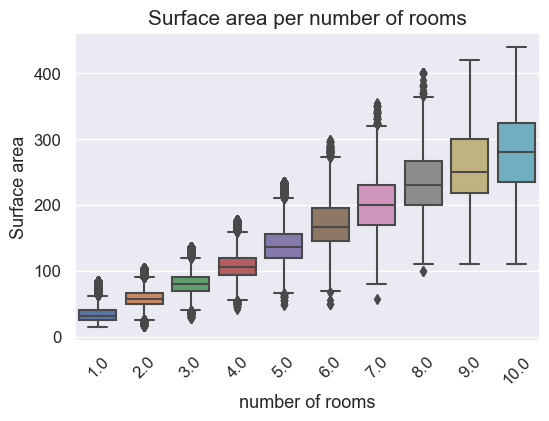

In [68]:
# boxplot of surface area per room
sns.set(rc={"figure.figsize": (6, 4)})

# set a grey background
sns.set(style="darkgrid")

chart = sns.boxplot(x=df["Anzahl Zimmer"], y=df.Wohnfläche)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title("Surface area per number of rooms", fontsize=15)
chart.set_xlabel("number of rooms", fontsize=13)
chart.set_ylabel("Surface area", fontsize=13)
chart.tick_params(labelsize=12)


plt.show()

__z-scores on net rent per m2 and year__

In [69]:
df.groupby(["Anzahl Zimmer"])["Nettomiete pro m2 und Jahr"].transform(zscore)

# filter with z_scores larger than 3 to remove outliers
R_zscores = df.groupby(["Anzahl Zimmer"])["Nettomiete pro m2 und Jahr"].transform(
    zscore
)

# convert each element to its absolute value
R_abs_z_scores = np.abs(R_zscores)
# create a boolean array with TRUE for values less than 3 standard deviations from the mean
R_filtered_entries = R_abs_z_scores < 3
R_filtered_entries.value_counts()

True     935467
False     14865
Name: Nettomiete pro m2 und Jahr, dtype: int64

In [70]:
# Filter the original DataFrame with this result
df = df[R_filtered_entries]

In [71]:
# show min and max of the rent per room
min = df.groupby(["Anzahl Zimmer"])["Nettomiete pro m2 und Jahr"].min()
print(min.round(1))

Anzahl Zimmer
1.0     54.9
2.0     50.2
3.0     50.2
4.0     50.1
5.0     50.2
6.0     50.7
7.0     59.0
8.0     62.4
9.0     78.3
10.0    55.3
Name: Nettomiete pro m2 und Jahr, dtype: float64


In [72]:
max = df.groupby(["Anzahl Zimmer"])["Nettomiete pro m2 und Jahr"].max()
print(max.round(1))

Anzahl Zimmer
1.0     720.0
2.0     523.3
3.0     439.5
4.0     412.4
5.0     464.5
6.0     536.0
7.0     568.0
8.0     576.6
9.0     540.0
10.0    523.4
Name: Nettomiete pro m2 und Jahr, dtype: float64


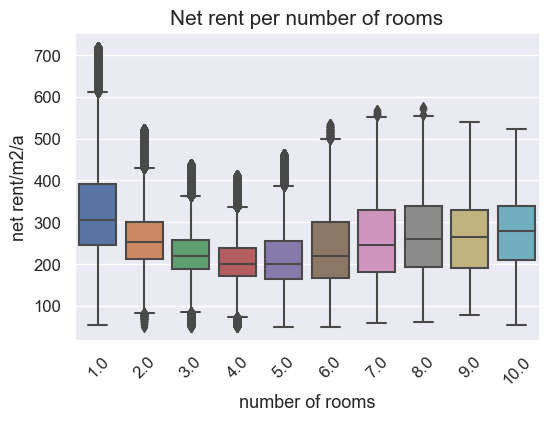

In [73]:
# boxplot of net rent per room
sns.set(rc={"figure.figsize": (6, 4)})

# set a grey background
sns.set(style="darkgrid")

chart = sns.boxplot(x=df["Anzahl Zimmer"], y=df["Nettomiete pro m2 und Jahr"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_title("Net rent per number of rooms", fontsize=15)
chart.set_xlabel("number of rooms", fontsize=13)
chart.set_ylabel("net rent/m2/a", fontsize=13)
chart.tick_params(labelsize=12)


plt.show()

__z-scores on net rent per month__

In [74]:
df.groupby(["Anzahl Zimmer"])["Nettomiete pro Monat"].transform(zscore)

# filter with z_scores larger than 3 to remove outliers
M_zscores = df.groupby(["Anzahl Zimmer"])["Nettomiete pro Monat"].transform(zscore)

# convert each element to its absolute value
M_abs_z_scores = np.abs(M_zscores)
# create a boolean array with TRUE for values less than 3 standard deviations from the mean
M_filtered_entries = M_abs_z_scores < 3
M_filtered_entries.value_counts()

True     921886
False     13581
Name: Nettomiete pro Monat, dtype: int64

In [75]:
# Filter the original DataFrame with this result
df = df[M_filtered_entries]

In [76]:
# show min and max of the rent per room
min = df.groupby(["Anzahl Zimmer"])["Nettomiete pro Monat"].min()
print(min.round(1))

Anzahl Zimmer
1.0      300.0
2.0      300.0
3.0      300.0
4.0      329.0
5.0      350.0
6.0      420.0
7.0      670.0
8.0     1040.0
9.0     1450.0
10.0     691.2
Name: Nettomiete pro Monat, dtype: float64


In [77]:
max = df.groupby(["Anzahl Zimmer"])["Nettomiete pro Monat"].max()
print(max.round(1))

Anzahl Zimmer
1.0     1815.0
2.0     2406.0
3.0     2943.0
4.0     3703.0
5.0     5370.0
6.0     7600.0
7.0     9600.0
8.0     9950.0
9.0     9950.0
10.0    9975.0
Name: Nettomiete pro Monat, dtype: float64


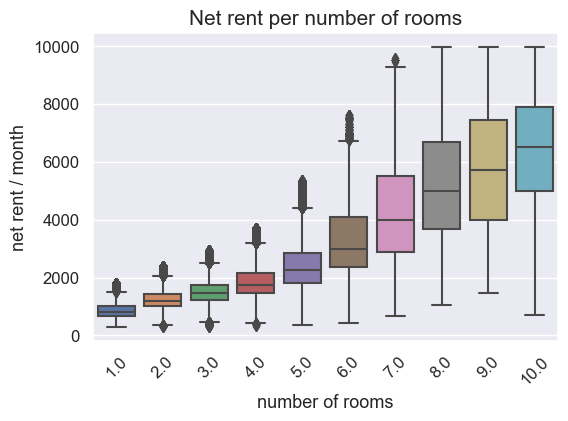

In [78]:
# boxplot of net rent per room
sns.set(rc={"figure.figsize": (6, 4)})

# set a grey background
sns.set(style="darkgrid")

chart = sns.boxplot(x=df["Anzahl Zimmer"], y=df["Nettomiete pro Monat"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# plt.ylim([0, 1000]) # limit y-axis to have a better view on the boxplots
chart.set_title("Net rent per number of rooms", fontsize=15)
chart.set_xlabel("number of rooms", fontsize=13)
chart.set_ylabel("net rent / month", fontsize=13)
chart.tick_params(labelsize=12)


plt.show()

I have detected and deleted all the outliers.

### Feature engineering

In [79]:
# Add two columns for the years and month to the dataset
df["Jahr_Erste_Publikation"] = df["Erste Publikation"].apply(lambda x: "%d" % (x.year))
df["Monat_Erste_Publikation"] = pd.DatetimeIndex(df["Erste Publikation"]).month

In [80]:
df[["Jahr_Erste_Publikation"]] = df[["Jahr_Erste_Publikation"]].astype(int)
df[["Monat_Erste_Publikation"]] = df[["Monat_Erste_Publikation"]].astype(int)

I will drop the input feature ``Erste Publikation`` used for the new combinations of features, as they don’t add modeling power and can lead to ill-conditioning and numerical issues.

In [81]:
# drop column
df = df.drop(["Erste Publikation"], axis=1)

In [82]:
df.shape

(921886, 21)

### Log transformation

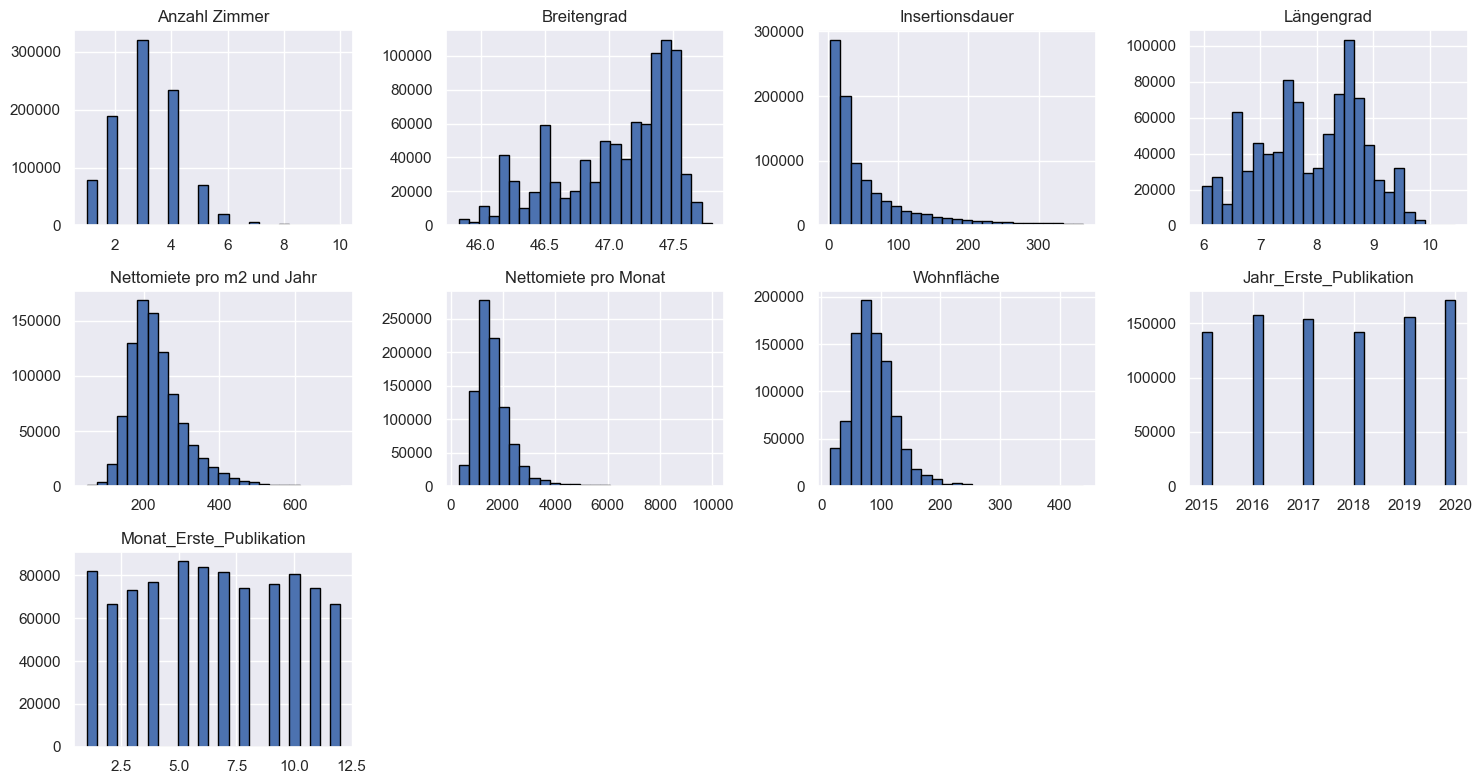

In [83]:
# Plots the histogram for each numerical feature in a separate subplot
df.select_dtypes(include="number").hist(
    bins=25, figsize=(15, 8), layout=(-1, 4), edgecolor="black"
)
plt.tight_layout()
plt.show()

The plots above show that some features are not normally distributed but skewed.

In [84]:
# Checking the distribution with Skewness
df.select_dtypes(include="number").skew()

Anzahl Zimmer                 0.529103
Breitengrad                  -0.713083
Insertionsdauer               2.125900
Längengrad                   -0.149165
Nettomiete pro m2 und Jahr    1.394851
Nettomiete pro Monat          2.663375
Wohnfläche                    1.247673
Jahr_Erste_Publikation       -0.025573
Monat_Erste_Publikation       0.000011
dtype: float64

In [85]:
# define the features with are positively skewed
df_skewed = [
    "Nettomiete pro m2 und Jahr",
    "Nettomiete pro Monat",
    "Insertionsdauer",
    "Wohnfläche",
]

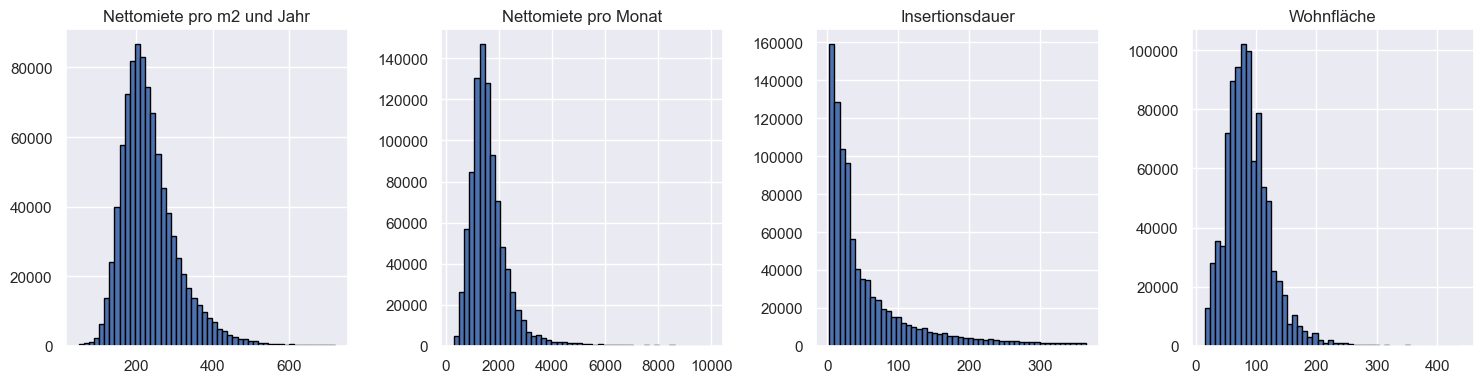

In [86]:
# Plots the histogram for each skewed feature in a separate subplot
df[df_skewed].hist(bins=50, figsize=(15, 4), layout=(-1, 4), edgecolor="black")
plt.tight_layout()
plt.show()

The variables have a skewness above 1 and are thus highly positively skewed. In a next step, I will transform there right-skewed features by log-transforming them.

In [87]:
# performing logarithmic transformation by applying log(x) element-wise to a subset of columns
df[df_skewed] = df[df_skewed].applymap(lambda x: np.log(x))

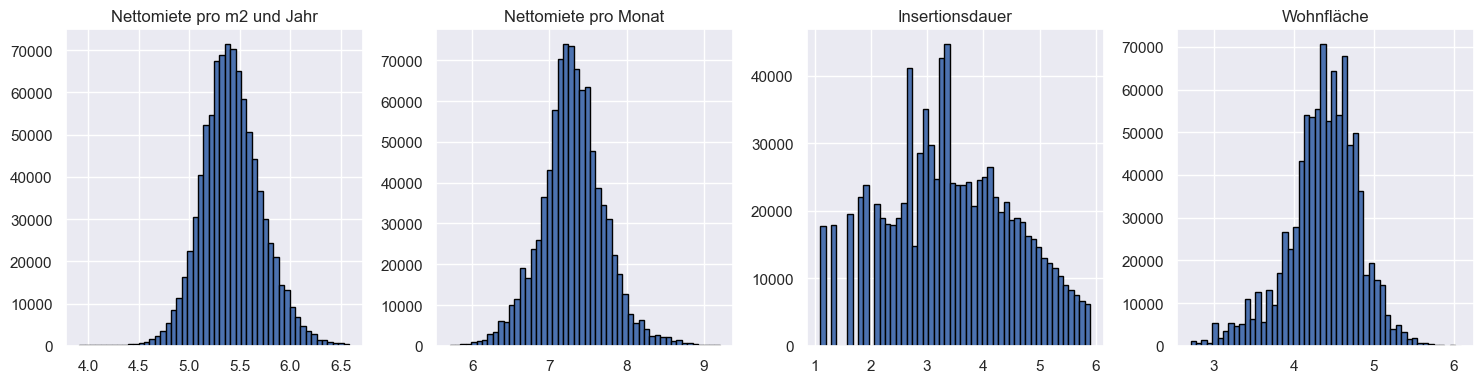

In [88]:
# Plots the histogram for each skewed feature in a separate subplot
df[df_skewed].hist(bins=50, figsize=(15, 4), layout=(-1, 4), edgecolor="black")
plt.tight_layout()
plt.show()

In [89]:
df.shape

(921886, 21)

In [90]:
# Checking the distribution with Skewness
df.select_dtypes(include="number").skew()

Anzahl Zimmer                 0.529103
Breitengrad                  -0.713083
Insertionsdauer               0.049645
Längengrad                   -0.149165
Nettomiete pro m2 und Jahr    0.157415
Nettomiete pro Monat          0.176528
Wohnfläche                   -0.553152
Jahr_Erste_Publikation       -0.025573
Monat_Erste_Publikation       0.000011
dtype: float64

## Export

In [91]:
# export to csv
from pathlib import Path

filepath = Path("Data/ads_after_eda.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath, index=False)